In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_dataset.csv', parse_dates=['Date'], index_col='Date')

# Calculate technical indicators
# 7-day and 21-day Moving Averages
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA21'] = df['Close'].rolling(window=21).mean()

# RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
df['RSI'] = calculate_rsi(df)

# MACD (Moving Average Convergence Divergence)
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']

# Create lagged macroeconomic features
macro_cols = ['CPIAUCSL', 'GDP', 'FEDFUNDS', 'U2RATE']
for col in macro_cols:
    df[f'{col}_lag1'] = df[col].shift(1)

# Initialize lists to store performance metrics
models = []
mse_scores = []
rmse_scores = []
r2_scores = []

# Train and evaluate models for 1 to 5 lag days
for k in range(1, 6):
    # Create lagged features for Close, RSI, MACD, MA7, MA21
    feature_cols = []
    for lag in range(k):
        df[f'Close_lag{lag}'] = df['Close'].shift(lag)
        df[f'RSI_lag{lag}'] = df['RSI'].shift(lag)
        df[f'MACD_lag{lag}'] = df['MACD'].shift(lag)
        df[f'MA7_lag{lag}'] = df['MA7'].shift(lag)
        df[f'MA21_lag{lag}'] = df['MA21'].shift(lag)
        feature_cols.extend([f'Close_lag{lag}', f'RSI_lag{lag}', f'MACD_lag{lag}', f'MA7_lag{lag}', f'MA21_lag{lag}'])

    # Add macroeconomic features
    feature_cols.extend([f'{col}_lag1' for col in macro_cols])

    # Define target (next day's closing price)
    df['Target'] = df['Close'].shift(-1)

    # Drop rows with NaN values
    df_model = df[feature_cols + ['Target']].dropna()

    # Split data
    X = df_model[feature_cols]
    y = df_model['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    models.append((k, model, X_test, y_test, y_pred))
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final dataset for stock prediction.csv', parse_dates=['Date'], index_col='Date')

In [6]:
# Calculate technical indicators
# 7-day and 21-day Moving Averages
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA21'] = df['Close'].rolling(window=21).mean()

# RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
df['RSI'] = calculate_rsi(df)

# MACD (Moving Average Convergence Divergence)
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']

In [7]:
# Create lagged macroeconomic features
macro_cols = ['CPIAUCSL', 'GDP', 'FEDFUNDS', 'U2RATE']
for col in macro_cols:
    df[f'{col}_lag1'] = df[col].shift(1)

In [8]:
# Initialize lists to store performance metrics
models = []
mse_scores = []
rmse_scores = []
r2_scores = []

# Train and evaluate models for 1 to 5 lag days
for k in range(1, 6):
    # Create lagged features for Close, RSI, MACD, MA7, MA21
    feature_cols = []
    for lag in range(k):
        df[f'Close_lag{lag}'] = df['Close'].shift(lag)
        df[f'RSI_lag{lag}'] = df['RSI'].shift(lag)
        df[f'MACD_lag{lag}'] = df['MACD'].shift(lag)
        df[f'MA7_lag{lag}'] = df['MA7'].shift(lag)
        df[f'MA21_lag{lag}'] = df['MA21'].shift(lag)
        feature_cols.extend([f'Close_lag{lag}', f'RSI_lag{lag}', f'MACD_lag{lag}', f'MA7_lag{lag}', f'MA21_lag{lag}'])

    # Add macroeconomic features
    feature_cols.extend([f'{col}_lag1' for col in macro_cols])

    # Define target (next day's closing price)
    df['Target'] = df['Close'].shift(-1)

    # Drop rows with NaN values
    df_model = df[feature_cols + ['Target']].dropna()

    # Split data
    X = df_model[feature_cols]
    y = df_model['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    models.append((k, model, X_test, y_test, y_pred))
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f'Lag days: {k}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}')

Lag days: 1, MSE: 2172.2410, RMSE: 46.6073, R2: 0.9951
Lag days: 2, MSE: 2242.0260, RMSE: 47.3500, R2: 0.9950
Lag days: 3, MSE: 2243.4079, RMSE: 47.3646, R2: 0.9950
Lag days: 4, MSE: 2258.2108, RMSE: 47.5206, R2: 0.9949
Lag days: 5, MSE: 2259.0330, RMSE: 47.5293, R2: 0.9949


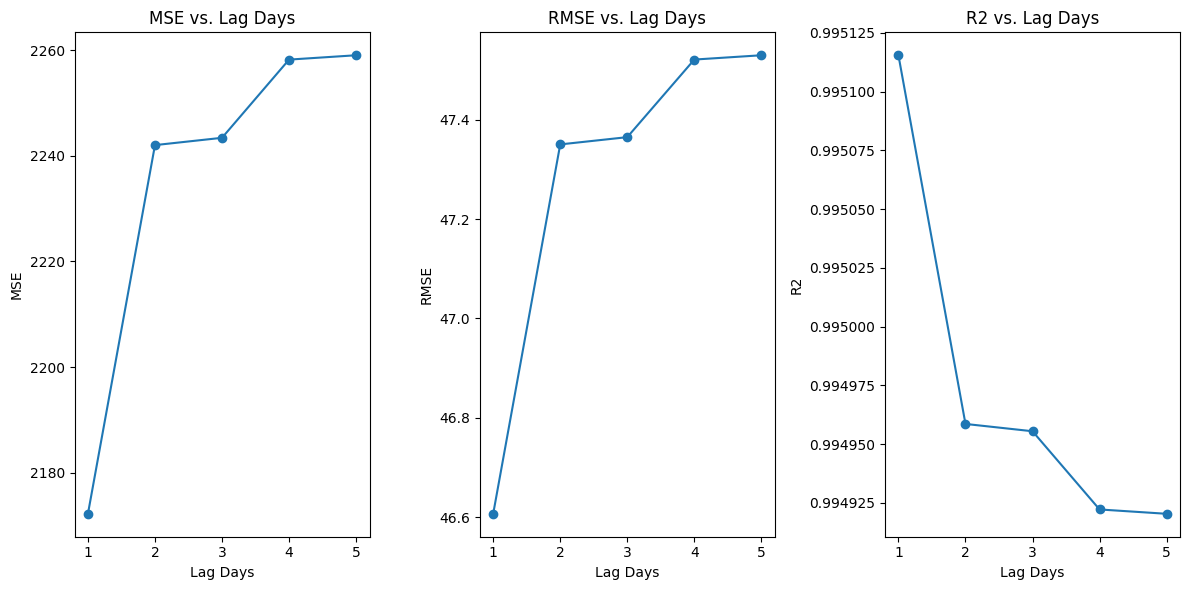

In [9]:
# Visualize performance metrics
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, 6), mse_scores, marker='o')
plt.title('MSE vs. Lag Days')
plt.xlabel('Lag Days')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(range(1, 6), rmse_scores, marker='o')
plt.title('RMSE vs. Lag Days')
plt.xlabel('Lag Days')
plt.ylabel('RMSE')

plt.subplot(1, 3, 3)
plt.plot(range(1, 6), r2_scores, marker='o')
plt.title('R2 vs. Lag Days')
plt.xlabel('Lag Days')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

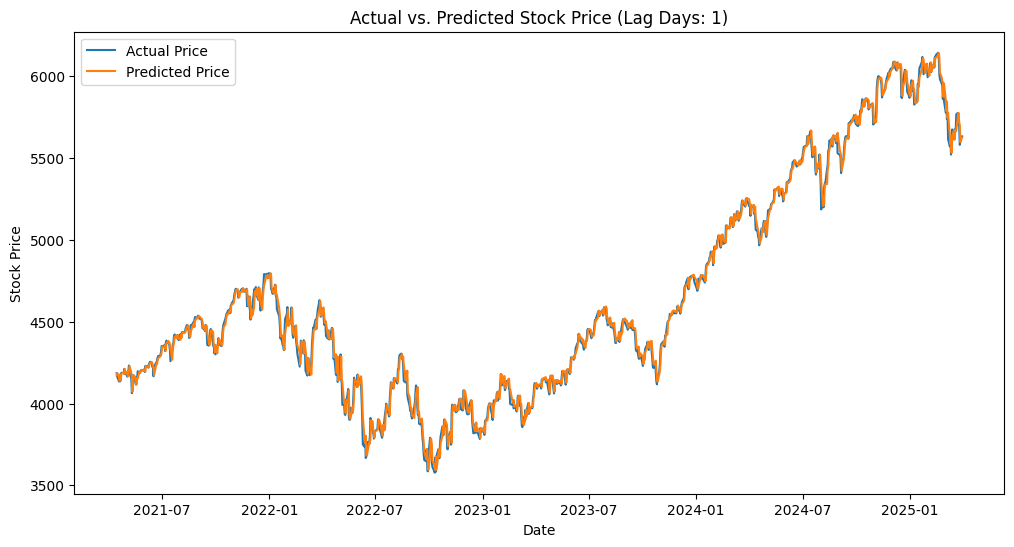

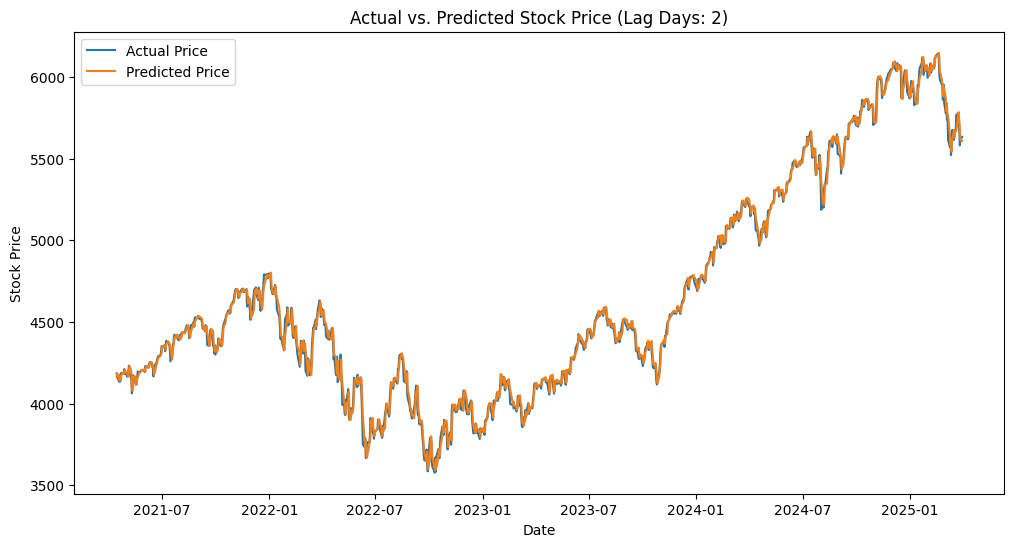

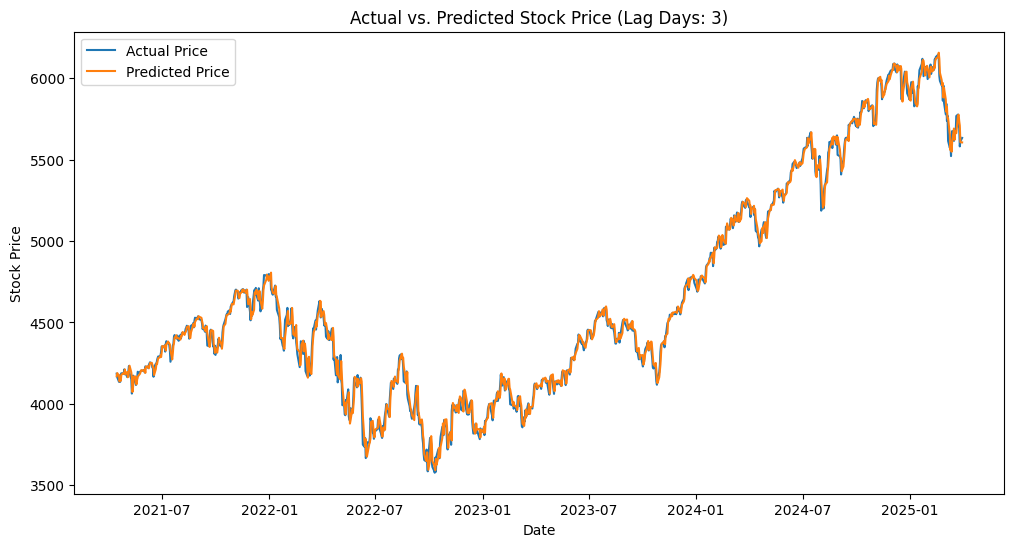

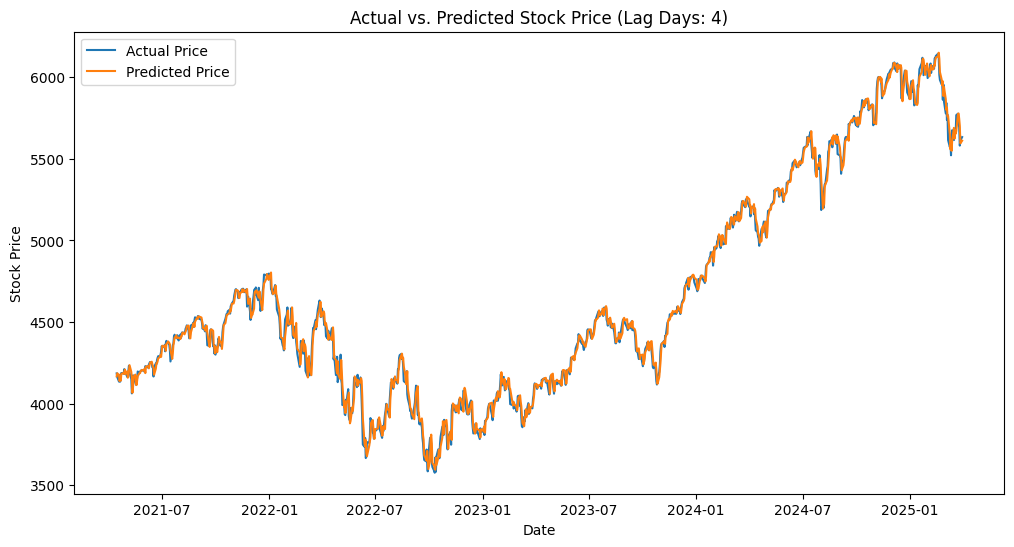

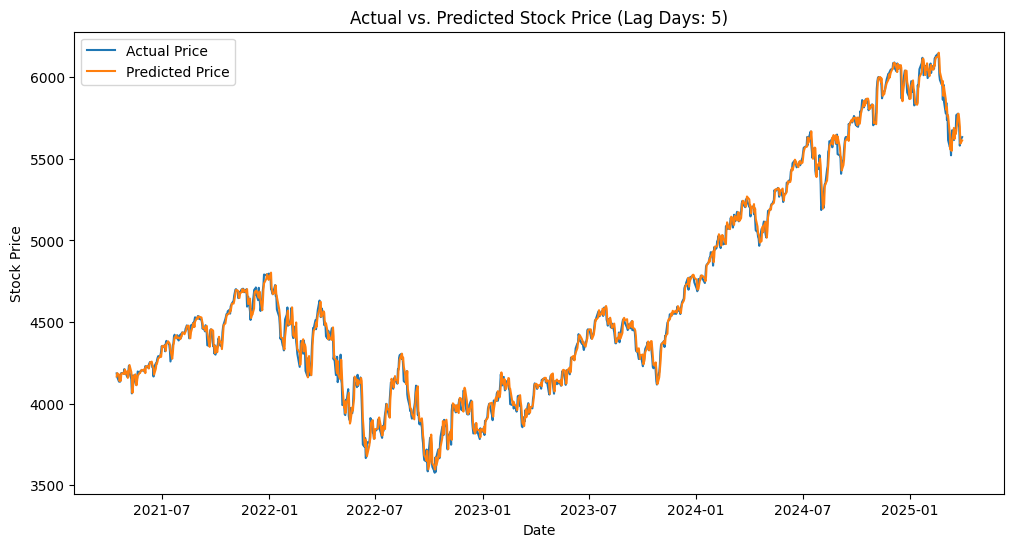

In [10]:
# Visualize actual vs. predicted prices for each model
for k, model, X_test, y_test, y_pred in models:
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Price')
    plt.plot(y_test.index, y_pred, label='Predicted Price')
    plt.title(f'Actual vs. Predicted Stock Price (Lag Days: {k})')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [11]:
# Display regression analysis (coefficients) for each model
for k, model, X_test, y_test, y_pred in models:
    print(f"--- Regression Analysis for Model with {k} Lag Day(s) ---")
    coefficients = pd.DataFrame(model.coef_, X_test.columns, columns=['Coefficient'])
    print(coefficients)
    print("\n")

--- Regression Analysis for Model with 1 Lag Day(s) ---
               Coefficient
Close_lag0        0.920269
RSI_lag0         -0.025841
MACD_lag0        -0.055808
MA7_lag0          0.129995
MA21_lag0        -0.055100
CPIAUCSL_lag1    -0.313553
GDP_lag1          0.003942
FEDFUNDS_lag1     0.679806
U2RATE_lag1       1.414853


--- Regression Analysis for Model with 2 Lag Day(s) ---
               Coefficient
Close_lag0        0.412765
RSI_lag0          0.281417
MACD_lag0         3.960841
MA7_lag0          0.147689
MA21_lag0         0.630208
Close_lag1        0.273817
RSI_lag1         -0.342839
MACD_lag1        -3.780641
MA7_lag1          0.050926
MA21_lag1        -0.519439
CPIAUCSL_lag1    -0.292098
GDP_lag1          0.003596
FEDFUNDS_lag1     0.624206
U2RATE_lag1       1.367263


--- Regression Analysis for Model with 3 Lag Day(s) ---
               Coefficient
Close_lag0        0.042434
RSI_lag0          0.160250
MACD_lag0         6.921116
MA7_lag0          1.128799
MA21_lag0         